In [2]:
crdt_crd<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

#checking overall dataset and coverting 'class' as factor variables 
str(crdt_crd)
crdt_crd$Class = as.factor(crdt_crd$Class)
str(crdt_crd$Class)



'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [52]:
crdt_crd_nw<-crdt_crd[,c("V17","V14","V12","V11","V10","V9","V16","V4","V18","V7","V26","Class")]
head(crdt_crd_nw)
str(crdt_crd_nw)

V17,V14,V12,V11,V10,V9,V16,V4,V18,V7,V26,Class
0.20797124,-0.3111694,-0.61780086,-0.5515995,0.09079417,0.3637870,-0.4704005,1.3781552,0.02579058,0.23959855,-0.1891148,0
-0.11480466,-0.1437723,1.06523531,1.6127267,-0.16697441,-0.2554251,0.4639170,0.4481541,-0.18336127,-0.07880298,0.1258945,0
1.10996938,-0.1659459,0.06608369,0.6245015,0.20764287,-1.5146543,-2.8900832,0.3797796,-0.12135931,0.79146096,-0.1390966,0
-0.68409279,-0.2879237,0.17822823,-0.2264873,-0.05495192,-1.3870241,-1.0596472,-0.8632913,1.96577500,0.23760894,-0.2219288,0
-0.23703324,-1.1196698,0.53819555,-0.8228429,0.75307443,0.8177393,-0.4514492,0.4030339,-0.03819479,0.59294075,0.5022922,0
-0.05813282,-0.1371337,0.35989384,1.3412620,-0.37140720,-0.5686714,0.4017259,-0.1682521,0.06865315,0.47620095,0.1059148,0


'data.frame':	284807 obs. of  12 variables:
 $ V17  : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V14  : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V12  : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V11  : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V10  : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V9   : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V16  : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V4   : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V18  : num  0.0258 -0.1834 -0.1214 1.9658 -0.0382 ...
 $ V7   : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V26  : num  -0.189 0.126 -0.139 -0.222 0.502 ...
 $ Class: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [53]:
table(crdt_crd_nw$Class)


# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(crdt_crd_nw), 0.8*nrow(crdt_crd_nw))  # row indices for training data
trainingData <- crdt_crd_nw[trainingRowIndex, ]  # model training data
testData  <- crdt_crd_nw[-trainingRowIndex, ]   # test data

head(testData )


     0      1 
284315    492 

,V17,V14,V12,V11,V10,V9,V16,V4,V18,V7,V26,Class
5,-0.2370332,-1.1196698,0.5381956,-0.8228429,0.75307443,0.8177393,-0.4514492,0.4030339,-0.03819479,0.5929407,0.50229222,0
18,-0.9287093,-0.2918965,0.2771921,0.3240978,-0.73797982,-0.6652714,1.1431737,-0.7272191,0.68046959,0.7076416,-0.04902673,0
21,0.5156635,-0.3726510,1.2983287,1.0191506,0.56852074,-0.4461958,-2.0445575,0.8341593,0.62584730,-0.8785859,-0.42223443,0
28,-0.2169352,0.1719451,-0.1113158,-0.6415063,0.86855855,-1.0714246,-1.3558707,0.5760377,1.27176539,-0.2649050,-0.28015817,0
32,0.1582562,0.5207879,0.6266990,1.1335557,0.08226226,0.2056868,-0.5291082,1.3357600,-0.39875148,-0.1187600,-0.33771813,0
35,-0.3096334,0.1022521,0.8534474,0.8717996,-0.48247447,-0.2856419,-0.2859125,0.1475755,-0.40390199,0.6930393,-0.55347097,0


In [72]:
logitMod <- glm(Class ~ V14+V17+V10+V12+V4+V16, 
                data=trainingData, 
                family=binomial(link="logit"))

#predicted <- plogis(predict(logitMod, testData))  # predicted scores
# or
predicted <- predict(logitMod, testData, type="response")  # predicted scores
head(predicted)


5           18           21           28           32           35 
0.0006695789 0.0001872141 0.0008358705 0.0004166535 0.0003877262 0.0003106788

In [1]:
#confusion matrix
table(testData$Class, predicted > 0.8)

ERROR: Error in table(testData$Class, predicted > 0.8): object 'testData' not found


In [76]:
logitMod
summary(logitMod)


Call:  glm(formula = Class ~ V14 + V17 + V10 + V12 + V4 + V16, family = binomial(link = "logit"), 
    data = trainingData)

Coefficients:
(Intercept)          V14          V17          V10          V12           V4  
   -8.14621     -0.73329      0.09414     -0.28834     -0.15630      0.44118  
        V16  
   -0.36049  

Degrees of Freedom: 227844 Total (i.e. Null);  227838 Residual
Null Deviance:	    5989 
Residual Deviance: 1941 	AIC: 1955


Call:
glm(formula = Class ~ V14 + V17 + V10 + V12 + V4 + V16, family = binomial(link = "logit"), 
    data = trainingData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9046  -0.0302  -0.0230  -0.0178   4.4195  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.14621    0.11837 -68.822  < 2e-16 ***
V14         -0.73329    0.04497 -16.306  < 2e-16 ***
V17          0.09414    0.04537   2.075   0.0380 *  
V10         -0.28834    0.04427  -6.513 7.37e-11 ***
V12         -0.15630    0.07272  -2.149   0.0316 *  
V4           0.44118    0.04687   9.413  < 2e-16 ***
V16         -0.36049    0.07075  -5.095 3.49e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5989.2  on 227844  degrees of freedom
Residual deviance: 1941.3  on 227838  degrees of freedom
AIC: 1955.3

Number of Fisher Scoring iterations: 11


In [77]:

library(car)
vif(logitMod)


V14      V17      V10      V12       V4      V16 
2.156082 3.064190 1.424351 3.306836 1.494814 2.682136

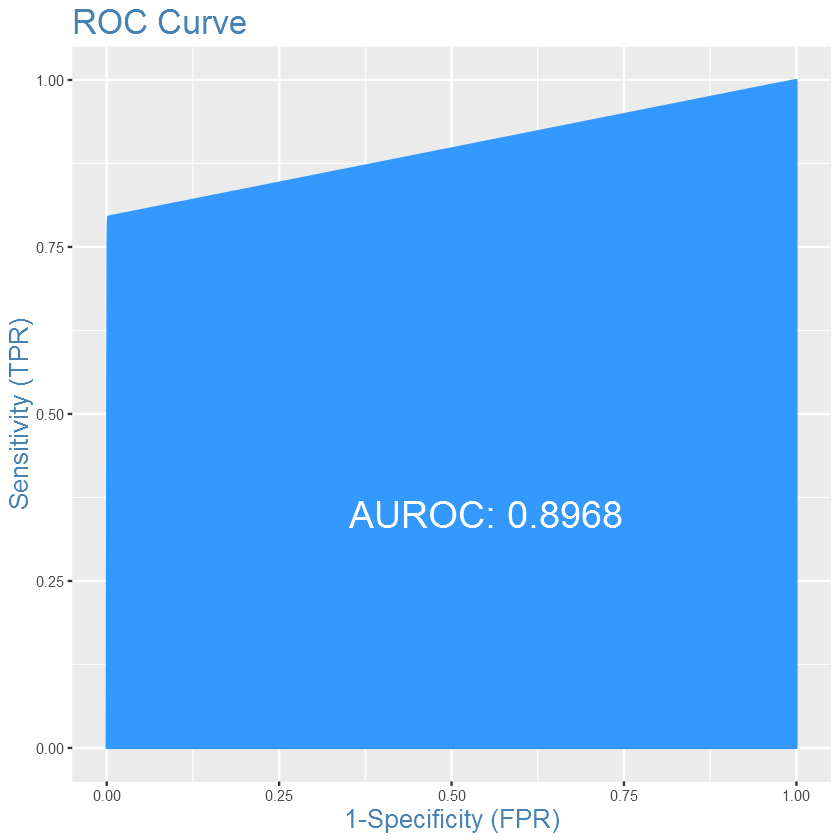

In [78]:
library(InformationValue)
plotROC(testData, predicted)